In [189]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt
/kaggle/input/house-prices-advanced-regression-techniques/train.csv
/kaggle/input/house-prices-advanced-regression-techniques/test.csv


In [190]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [191]:
train_df = pd.read_csv("/kaggle/input/house-prices-advanced-regression-techniques/train.csv")
test_df = pd.read_csv("/kaggle/input/house-prices-advanced-regression-techniques/test.csv")
sub_df = pd.read_csv("/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv")

In [192]:
train_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [193]:
test_ids = test_df['Id']

In [194]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [195]:
train_df[['GrLivArea', 'TotalBsmtSF', 'BedroomAbvGr', 'FullBath', 'HalfBath', 'BsmtFullBath', 'BsmtHalfBath']].isnull().sum()


GrLivArea       0
TotalBsmtSF     0
BedroomAbvGr    0
FullBath        0
HalfBath        0
BsmtFullBath    0
BsmtHalfBath    0
dtype: int64

In [196]:
test_df[['GrLivArea', 'TotalBsmtSF', 'BedroomAbvGr', 'FullBath', 'HalfBath', 'BsmtFullBath', 'BsmtHalfBath']].isnull().sum()


GrLivArea       0
TotalBsmtSF     1
BedroomAbvGr    0
FullBath        0
HalfBath        0
BsmtFullBath    2
BsmtHalfBath    2
dtype: int64

In [197]:
test_df['TotalBsmtSF'] = test_df['TotalBsmtSF'].fillna(test_df['TotalBsmtSF'].mean())
test_df['BsmtHalfBath'] = test_df['BsmtHalfBath'].fillna(0)
test_df['BsmtFullBath'] = test_df['BsmtFullBath'].fillna(0)


In [198]:
train_df['TotalArea'] = train_df['GrLivArea'] + train_df['TotalBsmtSF']
train_df['TotalBath'] = (train_df['FullBath'] + train_df['HalfBath']*0.5 + train_df['BsmtFullBath'] + train_df['BsmtHalfBath']*0.5)

final_df = train_df[['TotalArea', 'TotalBath', 'BedroomAbvGr', 'SalePrice']] 


test_df['TotalArea'] = test_df['GrLivArea'] + test_df['TotalBsmtSF']
test_df['TotalBath'] = (test_df['FullBath'] + test_df['HalfBath']*0.5 + test_df['BsmtFullBath'] + test_df['BsmtHalfBath']*0.5)

final_test_df = test_df[['TotalArea', 'TotalBath', 'BedroomAbvGr']] 

In [199]:
final_df.head()

,TotalArea,TotalBath,BedroomAbvGr,SalePrice
0,2566,3.5,3,208500
1,2524,2.5,3,181500
2,2706,3.5,3,223500
3,2473,2.0,3,140000
4,3343,3.5,4,250000


In [200]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   TotalArea     1460 non-null   int64  
 1   TotalBath     1460 non-null   float64
 2   BedroomAbvGr  1460 non-null   int64  
 3   SalePrice     1460 non-null   int64  
dtypes: float64(1), int64(3)
memory usage: 45.8 KB


In [201]:
final_df.describe()

,TotalArea,TotalBath,BedroomAbvGr,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000
mean,2572.893151,2.210616,2.866438,180921.195890
std,823.598492,0.785399,0.815778,79442.502883
min,334.000000,1.000000,0.000000,34900.000000
25%,2014.000000,2.000000,2.000000,129975.000000
50%,2479.000000,2.000000,3.000000,163000.000000
75%,3008.500000,2.500000,3.000000,214000.000000
max,11752.000000,6.000000,8.000000,755000.000000


In [202]:
final_test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   TotalArea     1459 non-null   float64
 1   TotalBath     1459 non-null   float64
 2   BedroomAbvGr  1459 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 34.3 KB


In [203]:
FEATURES = ['TotalArea', 'TotalBath', 'BedroomAbvGr']
TARGET = "SalePrice"

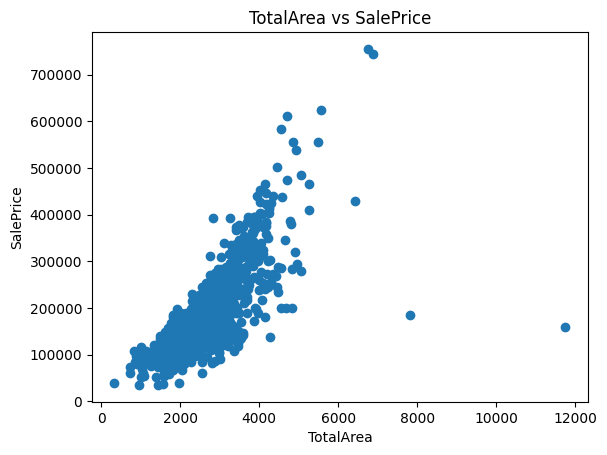

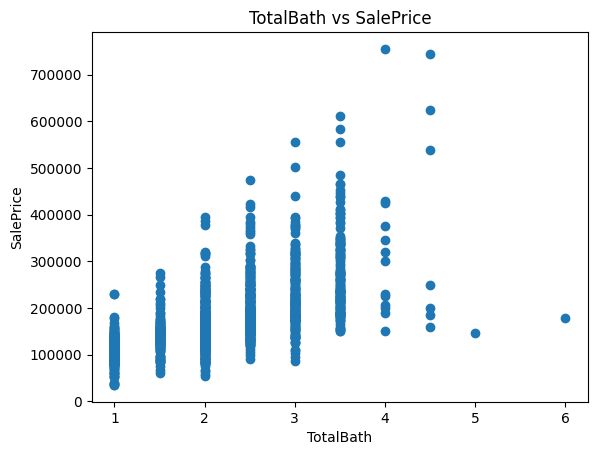

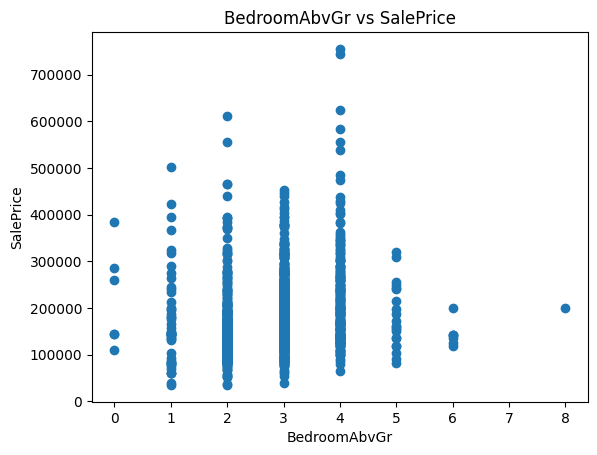

In [204]:
for col in FEATURES:
    plt.figure()
    plt.scatter(final_df[col], final_df[TARGET])
    plt.xlabel(col)
    plt.ylabel(TARGET)
    plt.title(f"{col} vs {TARGET}")
    plt.show()

In [205]:
final_df.head()

,TotalArea,TotalBath,BedroomAbvGr,SalePrice
0,2566,3.5,3,208500
1,2524,2.5,3,181500
2,2706,3.5,3,223500
3,2473,2.0,3,140000
4,3343,3.5,4,250000


In [206]:
X = final_df.drop('SalePrice', axis=1)
y = final_df['SalePrice']

In [207]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [208]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [209]:
y_pred = lr.predict(X_test)

In [210]:
print("mean_absolute_error", mean_absolute_error(y_test, y_pred))
print("mean_squared_error", mean_squared_error(y_test, y_pred))

mean_absolute_error 29657.319001780255
mean_squared_error 2143601547.2420204


***Without Standerd Scaler***
1. mean_absolute_error 29657.319001780255
2. mean_squared_error 2143601547.2420204

In [211]:
final_y_pred = lr.predict(final_test_df)

In [212]:
submission = pd.DataFrame({
    "Id": test_df['Id'],
    "SalePrice": final_y_pred
})

In [213]:
submission.to_csv("submission.csv", index=False)
